# Versionamento

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, recall_score, precision_score
import datetime

# Load Data

In [2]:
pwbdatafile = '..\\data\\pwb-validation.csv'    # 3 breaks
# pwbdatafile = '..\\data\\pwb-validation-b1-b3.csv'    # 2 breaks
# pwbdatafile = '..\\data\\pwb-validation-b1.csv'    # 1 break


pwbds = pd.read_csv(pwbdatafile)

In [3]:
pwbds.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/28/99 0:00,0,-3.787279,-17.31655,-18.198509,57.900154,0.039098,38.957985,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340184,76.346500,64.423974,-1.470630,0.011490,-100.8105,-0.006499,0
1,5/28/99 0:02,0,-3.787279,-17.31655,-18.198509,59.013069,0.035696,38.966500,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340273,78.859928,69.882226,-2.721852,0.011633,-100.8105,-0.006490,0
2,5/28/99 0:04,0,-3.787279,-17.31655,-18.198509,58.873999,0.032308,38.573860,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340364,73.129703,72.937097,-1.470630,0.011775,-100.8105,-0.006481,0
3,5/28/99 0:06,0,-3.787279,-17.31655,-18.198509,58.734901,0.028905,38.602883,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340453,76.468326,64.661676,-1.775806,0.011917,-100.8105,-0.006472,0
4,5/28/99 0:08,0,-3.787279,-17.31655,-18.198509,58.595831,0.025503,38.996651,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340544,67.490543,63.351892,-2.416676,0.012059,-100.8105,-0.006463,0


In [4]:
pwbds.shape

(709, 63)

In [5]:
pwbds.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,...,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.0
mean,0.004231,-0.873723,3.413932,3.454798,100.595613,-0.051923,18.282197,-0.102798,0.015020,0.062446,...,-1.379587,-1.713313,2.307771,26.856737,-18.218295,-1.216664,0.011369,-4.593376,-0.008512,0.0
std,0.064957,0.929088,6.997472,6.704211,56.071828,0.291105,30.012012,0.095239,0.116496,0.307538,...,0.382531,0.621665,0.618245,47.857491,52.459261,0.425775,0.018339,22.596244,0.002512,0.0
min,0.000000,-3.787279,-17.316550,-18.198509,-35.653772,-0.639964,-66.097557,-0.429273,-0.451141,-0.120087,...,-1.689041,-2.733586,1.340184,-68.247494,-110.513300,-2.840870,-0.013161,-100.810500,-0.012229,0.0
25%,0.000000,-1.275711,1.555028,1.400479,51.189155,-0.261759,18.814217,-0.139347,0.008773,-0.052031,...,-1.689041,-2.176213,1.396549,-7.498593,-40.657843,-1.470630,-0.002306,0.306681,-0.011309,0.0
50%,0.000000,-0.894125,2.224452,2.676851,130.069434,-0.064555,26.289437,-0.089298,0.038986,-0.010220,...,-1.689041,-1.820500,2.606552,13.218204,-32.920111,-1.226490,0.011784,0.598803,-0.008119,0.0
75%,0.000000,-0.005121,3.287998,7.780697,149.016669,0.181814,36.614052,-0.039246,0.058823,0.049901,...,-0.960770,-1.118351,2.700118,70.724674,-2.365637,-0.915699,0.016448,1.053881,-0.006086,0.0
max,1.000000,0.640447,16.742105,13.948689,177.938849,0.930257,59.127266,0.050782,0.288933,4.060033,...,-0.773514,-0.752385,6.637265,185.373111,88.226160,0.085826,0.067249,1.414400,-0.005078,0.0


In [6]:
pwbds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 63 columns):
time    709 non-null object
y       709 non-null int64
x1      709 non-null float64
x2      709 non-null float64
x3      709 non-null float64
x4      709 non-null float64
x5      709 non-null float64
x6      709 non-null float64
x7      709 non-null float64
x8      709 non-null float64
x9      709 non-null float64
x10     709 non-null float64
x11     709 non-null float64
x12     709 non-null float64
x13     709 non-null float64
x14     709 non-null float64
x15     709 non-null float64
x16     709 non-null float64
x17     709 non-null float64
x18     709 non-null float64
x19     709 non-null float64
x20     709 non-null float64
x21     709 non-null float64
x22     709 non-null float64
x23     709 non-null float64
x24     709 non-null float64
x25     709 non-null float64
x26     709 non-null float64
x27     709 non-null float64
x28     709 non-null int64
x29     709 non-null float64
x

In [7]:
pwbds['y'].value_counts()

0    706
1      3
Name: y, dtype: int64

In [8]:
pwbds.loc[pwbds['y']==1]

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
177,5/28/99 5:54,1,0.231069,1.183568,1.780737,74.636116,-0.406168,53.183663,-0.109135,-0.041277,...,-1.689041,-1.875920,1.396549,69.665592,82.686090,-0.616077,0.018050,1.120821,-0.005341,0
204,5/28/99 6:50,1,0.075007,-13.796615,-16.995079,177.938849,-0.240000,57.281533,-0.009339,-0.000993,...,-1.689041,-1.997746,2.452444,80.604312,-19.472189,-1.226490,0.014139,0.717982,-0.005746,0
320,5/28/99 10:50,1,-0.717117,-8.988349,-9.846894,158.351050,-0.114481,42.107338,-0.009339,0.288933,...,-1.689041,-2.520207,2.519503,18.840640,-26.888526,-0.796131,0.031466,1.121523,-0.007481,0


## Cálculo do Remaining Usefull Lifecycle (RUL)

In [9]:
pwbds['time']= pd.to_datetime(pwbds['time'])

# Dates whith break
df_sub = sorted(pwbds[pwbds['y'] == 1]['time'].tolist())

# variable to store all days
breakSubIdx=0
breakLstIdx=0
breakList = pwbds['y'].tolist()
nextbreak = []
for v1 in pwbds['time'].tolist():
    if((breakList[breakLstIdx] == 1)):
#        print ('1')
        nextbreak.append(v1)
        breakSubIdx = breakSubIdx+1
    else:
#        print('0')
        if (breakSubIdx < len(df_sub)):
            nextbreak.append(df_sub[breakSubIdx])
        else:
            nextbreak.append(df_sub[breakSubIdx-1])
    breakLstIdx = breakLstIdx+1
pwbds['nextbreaktime'] = pd.Series(nextbreak)
pwbds['RUL']=round((pwbds['nextbreaktime']-pwbds['time']).dt.total_seconds()/60,2)
pwbds.drop(pwbds[pwbds.RUL < 0].index, inplace=True)
pwbds.drop(['time','nextbreaktime'], axis=1, inplace=True)

In [10]:
pwbds.shape

(321, 63)

# Feature Selection and Scaling

In [11]:
# Feature Selection
# List of considered Features

FEATURES = [
    'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20',
    'x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x34','x35','x36','x37','x38','x39','x40',
    'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','x56','x57','x58','x59','x60'
#]
# Redução de feature usando resultado do PCA (notebook DimRedPCAOnTS)
#    'x1','x5','x8','x10','x13','x14','x15','x17','x18','x19','x20','x21','x22','x26','x28','x30','x31','x34',
#    'x35','x37','x38','x40','x41','x43','x46','x48','x49','x51','x53','x54','x55','x58'

# Usando as features com base na sua relação com RUL
#    'x4','x24','x48','x58','x60','x42','x45','x61','x46','x49','x9','x10','x38','x17','x5','x28','x33','x41',   
#    'x13','x16','x56','x8','x12','x1','x57','x50','x44','x47','x52','x27','x37','x3','x54','x26','x2','x29','x55'

# Cj 1 - Não usar: derrubou métricas quando adicionado ao Cj 4 + Cj 6
#    'x1','x2','x4','x5','x6','x7','x10', 'x11','x13','x15','x17','x28',
#    'x1','x5','x10','x13','x14','x15',
    
# Cj 2
# Medidos sem C3:
#    'x3','x8','x10','x12','x13','x16','x18','x19','x20','x23','x25', # Precision: 0.781, Recall: 0.390, F1: 0.520
#    'x3','x8','x10','x12','x13','x16',                               # Precision: 0.834, Recall: 0.375, F1: 0.518
#    'x18','x19','x20','x23','x25',                                   # Precision: 0.980, Recall: 0.156, F1: 0.269
#    'x3','x8','x10','x18','x19','x20',                               # Precision: 0.848, Recall: 0.251, F1: 0.387
#    'x12','x13','x16','x23','x25',                                   # Precision: 0.900, Recall: 0.218, F1: 0.351
# Medidos com C3:
###    'x3','x8','x10','x12','x13','x16','x18','x19','x20','x23','x25',  # Precision: 0.735, Recall: 0.470, F1: 0.573

    # Cj 3
###   'x9','x21','x22','x24','x26','x27','x29','x30',                   # Precision: 0.735, Recall: 0.470, F1: 0.573
#    'x9','x21','x22','x24',                                          # Precision: 0.785, Recall: 0.451, F1: 0.573
#    'x26','x27','x29','x30',                                         # Precision: 0.766, Recall: 0.406, F1: 0.530
#    'x9','x21','x29','x30',                                          # Precision: 0.742, Recall: 0.353, F1: 0.478
#    'x22','x24','x26','x27',                                          # Precision: 0.801, Recall: 0.383, F1: 0.518   
    
# Cj 4
###    'x28','x36','x37','x38','x39','x40','x31','x32','x33','x34','x35',
    
# Cj 5
#    'x41','x42','x43','x44','x45','x46','x47','x48','x49','x52',

# Cj 6
###   'x50','x51','x53','x54','x55','x56','x57','x58','x59','x60'
]

# Create the dataset with features and filter the data to the list of FEATURES
pwbds_filtered = pwbds[FEATURES]

# Print the tail of the dataframe
pwbds_filtered.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
316,-0.842707,13.601751,13.935345,160.604102,0.003973,44.368416,-0.060895,0.183380,-0.049627,0.007243,...,29.902837,-1.689041,-2.502873,2.619979,23.443302,-26.953970,-2.596729,0.045492,1.242174,-0.007423
317,-0.814918,13.597999,13.761725,160.489996,-0.025645,40.372109,-0.044352,0.217521,-0.072235,-0.026898,...,29.943120,-1.689041,-2.507268,2.594859,21.177799,-26.937613,-1.470630,0.040017,0.594202,-0.007438
318,-0.787129,13.460828,13.824803,160.375922,-0.055247,40.684334,-0.027811,0.251662,-0.094842,-0.061039,...,29.983403,-1.689041,-2.511662,2.569741,15.235538,-26.921240,-0.219349,0.040017,0.344118,-0.007452
319,-0.759339,-8.898044,13.828613,159.445166,-0.084864,44.653633,-0.011269,0.285803,-0.117449,-0.095180,...,29.984624,-1.689041,-2.516057,2.544622,24.041080,-26.904883,-0.921253,0.034558,0.858965,-0.007467
320,-0.717117,-8.988349,-9.846894,158.351050,-0.114481,42.107338,-0.009339,0.288933,-0.120087,-0.098310,...,29.984624,-1.689041,-2.520207,2.519503,18.840640,-26.888526,-0.796131,0.031466,1.121523,-0.007481


In [12]:
# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler, MinMaxScaler 

# Get the number of rows in the data
nrows = pwbds_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(pwbds_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)
pwbds_scaled = pd.DataFrame(
    np_data_scaled,
    columns=FEATURES
)

(321, 60)


# Shaping & Splitting

In [13]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        
        # if index is larger than the size of the dataset, we stop
        if end_ix > x_data.shape[0]:
            break
        
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix-1]
        
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

## Dataset for Model 1

In [14]:
pwbds_m1 = pwbds_scaled.copy()
#pwbds_m1.drop('NEXT_H',axis='columns', inplace=True)
yds_m1 = pwbds.pop('RUL')

## Apply PCA

In [15]:
pwbds_m1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
0,0.0,0.0,0.0,0.438002,0.432463,0.782817,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000000,0.570119,0.807306,0.445643,0.293454,0.0,0.408656
1,0.0,0.0,0.0,0.443212,0.430296,0.782908,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000062,0.580029,0.851494,0.000000,0.296028,0.0,0.412401
2,0.0,0.0,0.0,0.442561,0.428138,0.778681,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000126,0.557436,0.876225,0.445643,0.298585,0.0,0.416146
3,0.0,0.0,0.0,0.441910,0.425971,0.778993,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000188,0.570600,0.809230,0.336949,0.301141,0.0,0.419892
4,0.0,0.0,0.0,0.441259,0.423805,0.783233,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000252,0.535201,0.798627,0.108693,0.303697,0.0,0.423637


In [16]:
from sklearn.decomposition import PCA # for PCA calculation
pca = PCA()
X_pca = pca.fit(pwbds_m1)

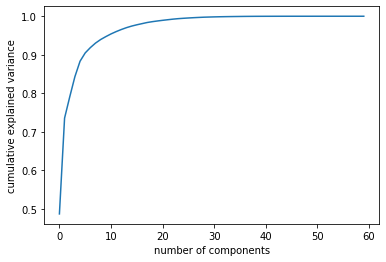

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
num_components = 40
pca = PCA(num_components)  
X_pca = pca.fit_transform(pwbds_m1) # fit and reduce dimension

In [19]:
X_pca.shape

(321, 40)

In [20]:
num_steps = 5 # Intervalo entre medições é de 2 segundos
x_new, y_new = lstm_data_transform(X_pca, yds_m1, num_steps=num_steps)
print ("The new shape of x is", x_new.shape)
print ("The new shape of y is", y_new.shape)


The new shape of x is (317, 5, 40)
The new shape of y is (317,)


In [21]:
import tensorflow as tf
from tensorflow import keras

model_m1 = keras.models.load_model('../data/pwb_regression-5stps-noavalanche-pca40-batchnormal-bidir')


C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\pyth

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-pac

In [22]:
# Verify the architecture 
print(model_m1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  154560    
_________________________________________________________________
batch_normalization (BatchNo multiple                  960       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
bidirectional_1 (Bidirection multiple                  144480    
_________________________________________________________________
batch_normalization_1 (Batch multiple                  480       
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  7

In [23]:
x_new.shape

(317, 5, 40)

In [24]:
x_new[0][0]

array([ 3.27569785e+00,  1.66219786e+00, -7.58917729e-02,  1.19810751e-01,
        6.43116951e-02,  1.09591958e-01, -1.62665751e-01, -1.27366783e-01,
       -1.80805186e-01,  7.96599483e-02, -3.60994213e-02, -1.32906332e-02,
        2.88556172e-01,  4.83423565e-01, -8.68258983e-02,  3.07236240e-01,
       -1.95589639e-01, -2.47890507e-01,  1.08745384e-01, -1.07046519e-01,
       -2.21712021e-01, -5.80965486e-02, -2.83869688e-03, -5.15109496e-03,
       -2.65890073e-03, -1.60524491e-02, -4.83912250e-04,  7.16977585e-02,
        2.01890417e-02, -2.65481833e-02,  4.16326723e-03,  4.19045562e-02,
       -3.02948281e-03,  5.03704541e-03, -1.08270419e-02,  2.64549124e-02,
        2.08170960e-02,  2.52201636e-03, -2.86562765e-02,  6.00558763e-03])

In [25]:
test_predict = model_m1.predict(x_new)

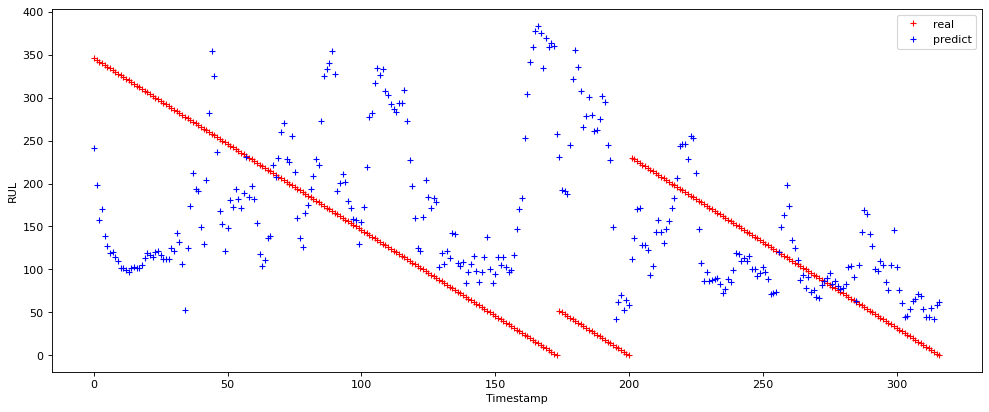

In [26]:
figure(figsize=(15, 6), dpi=80)
plt.xlabel('Timestamp')
plt.ylabel('RUL')
plt.plot(y_new,'r+',label="real")
plt.plot(test_predict,'b+',label="predict")
plt.legend(['real', 'predict'], loc='upper right')

In [28]:
import math
errordf = pd.DataFrame(y_new,columns=['real'])
errordf['pred']=test_predict
errordf['rul_diff']=(errordf['real']-errordf['pred'])
errordf['rul_diff']= errordf['rul_diff'].astype('float')
rul_error_mean = errordf['rul_diff'].sum()/len(errordf['rul_diff'])
rul_error_ahead = np.mean(errordf['rul_diff'].loc[errordf['rul_diff']<0])
rul_error_behind = np.mean(errordf['rul_diff'].loc[errordf['rul_diff']>0])
print ('Erro RUL médio: ',rul_error_mean, '\nErro RUL adiantado: ',rul_error_ahead, '\nErro RUL atrasado: ',rul_error_behind)

Erro RUL médio:  -21.99322951404078 
Erro RUL adiantado:  -101.09308172155309 
Erro RUL atrasado:  94.80264601111412


In [ ]:
errordf.loc[(errordf['rul_diff'] <= 1) & (errordf['rul_diff'] >= -1)]

## Truth

### Quantas quebras realmente ocorreram?

In [ ]:
# Registro de quebras são aqueles onde RUL==0 (y_test==0)
np.unique(y_new==0,return_counts=True)

### Quando ocorreram?

In [ ]:
break_moments= np.where(y_new == 1)

In [ ]:
list(break_moments)

## Previsões

### Quantas indicações abaixo de x minutos? 

In [ ]:
np.unique(test_predict < 90 ,return_counts=True)

### Quando ocorreram?

In [ ]:
np.where(test_predict < 90)[0]

## Acertos
### Quantos e quando?

In [ ]:
when_pred = np.where(test_predict < 90)[0].tolist()
when_true = np.where(y_new == 0)[0].tolist()

In [ ]:
commonalities = set(when_pred) - (set(when_pred) - set(when_true))

In [ ]:
len(commonalities)

In [ ]:
commonalities

In [ ]:
import shap  # package used to calculate Shap values

# use Deep SHAP to explain test set predictions
#k_explainer = shap.KernelExplainer(model_1.predict_proba, x_test)
#k_shap_values = k_explainer.shap_values(x_test.reshape(14315*30,32))
#shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], x_test)